<a href="https://colab.research.google.com/github/Utka7784/SOC-Brute-Force-Detection-Analysis-Colab-Simulation/blob/main/SOC_Analyst_Investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import random
import datetime as dt


In [5]:
ips = ["192.168.1.5", "45.33.32.156", "185.199.108.153", "91.121.79.36"]
users = ["roots", "admin", "ubuntu", "test", "guest"]
statuses = ["Failed", "Failed", "Failed", "Success"]

data = []
for _ in range(200):
  ip = random.choice(ips)
  user = random.choice(users)
  status = random.choices(statuses, weights=[0.6,0.2,0.1, 0.1])[0]
  timestamp = (dt.datetime.now() - dt.timedelta(minutes=random.randint(0, 5000))).strftime("%Y-%m-%d %H:%M:%S")
  data.append([timestamp, ip, user, status])

logs = pd.DataFrame(data, columns=["timestamp", "source_ip", "username", "status"])

print("Sample Log Data:")
display(logs.head(10))

failed_counts = logs[logs["status"]=="Failed"].groupby("source_ip").size()
suspicious_ips = failed_counts[failed_counts > 5].index.tolist()

print("\n Suspicious IPs (possible brute-force):")
for ip in suspicious_ips:
  print(f"-{ip}")

  for ip in suspicious_ips:
    if "Success" in logs[logs["source_ip"]==ip]["status"].values:
      print(f"{ip} has successful login after multiple failures -> Potential compromise")

Sample Log Data:


,timestamp,source_ip,username,status
0,2025-10-28 07:41:39,192.168.1.5,ubuntu,Failed
1,2025-10-29 23:34:39,45.33.32.156,roots,Failed
2,2025-10-29 06:24:39,45.33.32.156,roots,Success
3,2025-10-28 13:46:39,185.199.108.153,roots,Failed
4,2025-10-27 06:13:39,185.199.108.153,test,Failed
5,2025-10-28 19:27:39,192.168.1.5,test,Success
6,2025-10-28 21:05:39,192.168.1.5,guest,Failed
7,2025-10-27 08:07:39,185.199.108.153,test,Failed
8,2025-10-30 02:37:39,192.168.1.5,admin,Failed
9,2025-10-29 07:29:39,91.121.79.36,guest,Success



 Suspicious IPs (possible brute-force):
-185.199.108.153
185.199.108.153 has successful login after multiple failures -> Potential compromise
192.168.1.5 has successful login after multiple failures -> Potential compromise
45.33.32.156 has successful login after multiple failures -> Potential compromise
91.121.79.36 has successful login after multiple failures -> Potential compromise
-192.168.1.5
185.199.108.153 has successful login after multiple failures -> Potential compromise
192.168.1.5 has successful login after multiple failures -> Potential compromise
45.33.32.156 has successful login after multiple failures -> Potential compromise
91.121.79.36 has successful login after multiple failures -> Potential compromise
-45.33.32.156
185.199.108.153 has successful login after multiple failures -> Potential compromise
192.168.1.5 has successful login after multiple failures -> Potential compromise
45.33.32.156 has successful login after multiple failures -> Potential compromise
91.121.

In [8]:
import requests
def check_ip_reputation(ip):
  url = f"https://www.virustotal.com/api/v3/ip_addresses/{ip}"
  header = {"x-apikey": "936affef730417fae33aecbf0e1ffa7c029ba9f9e55a4cf58dfe17a9e15e0c88"}
  response = requests.get(url, headers=header)
  if response.status_code == 200:
    data = response.json()
    malicious = data["data"]["attributes"]["last_analysis_stats"]["malicious"]
    print(f"{ip}: {malicious} engines flagged it as malicious.")
  else:
    print(f"{ip}: Unable to fetch data (status {response.status_code})")
for ip in suspicious_ips:
  check_ip_reputation(ip)

185.199.108.153: 1 engines flagged it as malicious.
192.168.1.5: 1 engines flagged it as malicious.
45.33.32.156: 2 engines flagged it as malicious.
91.121.79.36: 0 engines flagged it as malicious.


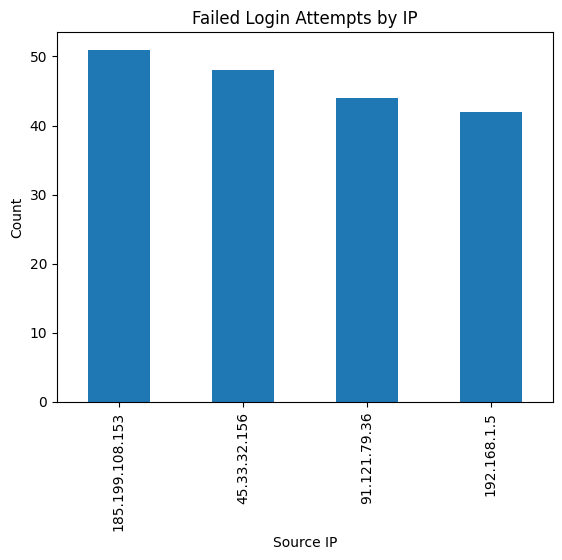

In [9]:
import matplotlib.pyplot as plt
failed_counts.sort_values(ascending=False).plot(kind='bar')
plt.title("Failed Login Attempts by IP")
plt.xlabel("Source IP")
plt.ylabel("Count")
plt.show()

In [11]:
## Now run somethings that will give us :
#Table of Logs: Realistic failed/success login events

#Suspicious IP Detection: Based on correlation rules

#Geo Lookup: Country & ISP of attacker IPs

#Bar Graph: Top attacking IPs visualization

🔍 Sample SSH Log Data:


,timestamp,source_ip,username,status
0,2025-10-29 14:43:53,192.168.1.5,root,Failed
1,2025-10-30 13:42:53,91.121.79.36,root,Failed
2,2025-10-30 10:52:53,91.121.79.36,root,Failed
3,2025-10-29 09:12:53,103.21.244.0,admin,Failed
4,2025-10-28 14:15:53,91.121.79.36,root,Failed
5,2025-10-29 20:50:53,192.168.1.5,guest,Success
6,2025-10-30 01:38:53,45.33.32.156,guest,Success
7,2025-10-29 05:26:53,185.199.108.153,guest,Failed
8,2025-10-29 14:51:53,103.21.244.0,admin,Failed
9,2025-10-30 01:40:53,185.199.108.153,root,Failed



🚨 Suspicious IPs (more than 5 failed attempts):
- 103.21.244.0
- 185.199.108.153
- 192.168.1.5
- 45.33.32.156
- 91.121.79.36
⚠️  103.21.244.0 had a successful login after multiple failures → Potential compromise!
⚠️  185.199.108.153 had a successful login after multiple failures → Potential compromise!
⚠️  192.168.1.5 had a successful login after multiple failures → Potential compromise!
⚠️  45.33.32.156 had a successful login after multiple failures → Potential compromise!
⚠️  91.121.79.36 had a successful login after multiple failures → Potential compromise!

🌍 Geolocation Lookup:
103.21.244.0 → Montreal, Canada (Cloudflare, inc.)
185.199.108.153 → San Francisco, United States (GitHub, Inc)
192.168.1.5 → Unknown, Unknown (Unknown)
45.33.32.156 → Fremont, United States (Linode)
91.121.79.36 → Roubaix, France (OVH ISP)


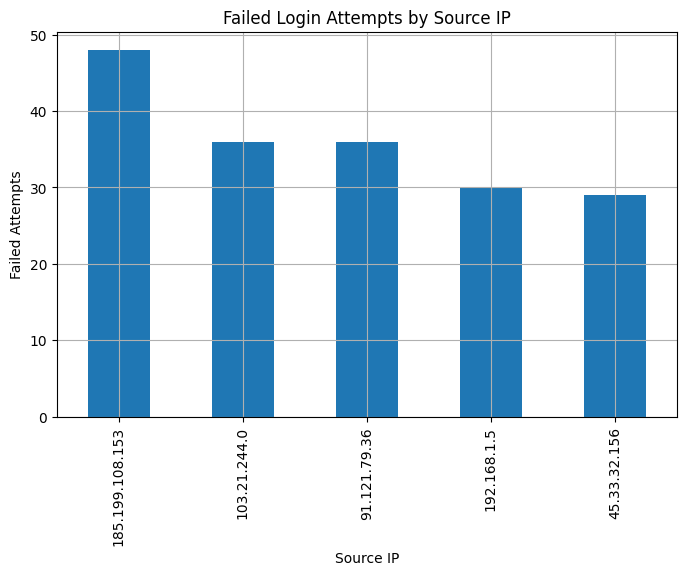


📄 Incident Summary Report:


,Source IP,Failed Attempts,Successful Login,Country,City,Org
0,103.21.244.0,36,✅,Canada,Montreal,"Cloudflare, inc."
1,185.199.108.153,48,✅,United States,San Francisco,"GitHub, Inc"
2,192.168.1.5,30,✅,Unknown,Unknown,Unknown
3,45.33.32.156,29,✅,United States,Fremont,Linode
4,91.121.79.36,36,✅,France,Roubaix,OVH ISP



🧠 SOC Summary:
---------------------------------------------------
Total Logins Analyzed: 200
Suspicious IPs Detected: 5
Potential Compromised IPs: 5
---------------------------------------------------
Incident Notes:
- Detected multiple failed SSH login attempts indicating brute-force activity.
- Some IPs succeeded after repeated failures → possible credential compromise.
- Recommended actions: block offending IPs, enforce account lockout policies, investigate root account access logs.
---------------------------------------------------


In [12]:
# --- SOC LAB: SSH BRUTE FORCE DETECTION AND ANALYSIS ---
import pandas as pd
import random
import datetime as dt
import requests
import matplotlib.pyplot as plt

# Step 1: Generate synthetic SSH login logs
ips = ["45.33.32.156", "103.21.244.0", "185.199.108.153", "91.121.79.36", "192.168.1.5"]
users = ["root", "admin", "ubuntu", "test", "guest"]
statuses = ["Failed", "Failed", "Failed", "Success"]

data = []
for _ in range(200):
    ip = random.choice(ips)
    user = random.choice(users)
    status = random.choices(statuses, weights=[0.6, 0.2, 0.1, 0.1])[0]
    timestamp = (dt.datetime.now() - dt.timedelta(minutes=random.randint(0, 3000))).strftime("%Y-%m-%d %H:%M:%S")
    data.append([timestamp, ip, user, status])

logs = pd.DataFrame(data, columns=["timestamp", "source_ip", "username", "status"])

print("🔍 Sample SSH Log Data:")
display(logs.head(10))

# Step 2: Identify brute-force attempts (IPs with >5 failed logins)
failed_counts = logs[logs["status"] == "Failed"].groupby("source_ip").size()
suspicious_ips = failed_counts[failed_counts > 5].index.tolist()

print("\n🚨 Suspicious IPs (more than 5 failed attempts):")
for ip in suspicious_ips:
    print(f"- {ip}")

# Step 3: Check which suspicious IPs had a successful login after failures
compromised_ips = []
for ip in suspicious_ips:
    subset = logs[logs["source_ip"] == ip]["status"].values
    if "Success" in subset:
        compromised_ips.append(ip)
        print(f"⚠️  {ip} had a successful login after multiple failures → Potential compromise!")

# Step 4: Geolocation lookup for suspicious IPs
print("\n🌍 Geolocation Lookup:")
geo_data = []
for ip in suspicious_ips:
    try:
        response = requests.get(f"http://ip-api.com/json/{ip}").json()
        country = response.get("country", "Unknown")
        org = response.get("org", "Unknown")
        city = response.get("city", "Unknown")
        geo_data.append([ip, country, city, org])
        print(f"{ip} → {city}, {country} ({org})")
    except:
        geo_data.append([ip, "Unknown", "Unknown", "Unknown"])

geo_df = pd.DataFrame(geo_data, columns=["IP", "Country", "City", "Org"])

# Step 5: Visualization of failed attempts by IP
plt.figure(figsize=(8,5))
failed_counts.sort_values(ascending=False).plot(kind='bar')
plt.title("Failed Login Attempts by Source IP")
plt.xlabel("Source IP")
plt.ylabel("Failed Attempts")
plt.grid(True)
plt.show()

# Step 6: Create a summary report
report = pd.DataFrame({
    "Source IP": suspicious_ips,
    "Failed Attempts": [failed_counts[ip] for ip in suspicious_ips],
    "Successful Login": ["✅" if ip in compromised_ips else "❌" for ip in suspicious_ips]
}).merge(geo_df, left_on="Source IP", right_on="IP").drop(columns="IP")

print("\n📄 Incident Summary Report:")
display(report)

# Step 7: Final SOC Summary
print("\n🧠 SOC Summary:")
print("---------------------------------------------------")
print(f"Total Logins Analyzed: {len(logs)}")
print(f"Suspicious IPs Detected: {len(suspicious_ips)}")
print(f"Potential Compromised IPs: {len(compromised_ips)}")
print("---------------------------------------------------")
print("Incident Notes:")
print("- Detected multiple failed SSH login attempts indicating brute-force activity.")
print("- Some IPs succeeded after repeated failures → possible credential compromise.")
print("- Recommended actions: block offending IPs, enforce account lockout policies, investigate root account access logs.")
print("---------------------------------------------------")


In [13]:
# Now finally let's build a mini SOC automation pipeline that analyzes logs, identifies brute-force attacks, enriches IP data, and assigns severity levels.


🧾 Updated Incident Report with Severity Classification:


,Source IP,Failed Attempts,Successful Login,Country,City,Org,Severity
0,103.21.244.0,36,✅,Canada,Montreal,"Cloudflare, inc.",High
1,185.199.108.153,48,✅,United States,San Francisco,"GitHub, Inc",High
2,192.168.1.5,30,✅,Unknown,Unknown,Unknown,High
3,45.33.32.156,29,✅,United States,Fremont,Linode,High
4,91.121.79.36,36,✅,France,Roubaix,OVH ISP,High


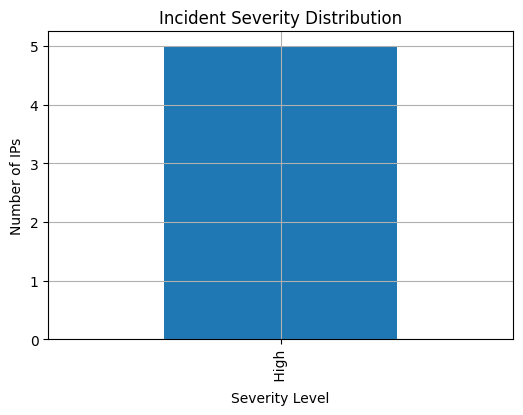


📊 Automated SOC Intelligence Summary:
---------------------------------------------------
Total Suspicious IPs: 5
High Severity: 5
Medium Severity: 0
Low Severity: 0
---------------------------------------------------
Action Recommendations:
-  High: Immediate IP block and password reset for impacted accounts.
-  Medium: Monitor activity closely and enable MFA.
-  Low: Review logs periodically, potential false positives.
---------------------------------------------------
✅ Report ready for SOC escalation or documentation.


In [16]:
# --- STEP 8: AUTOMATED INCIDENT SEVERITY CLASSIFICATION ---

# Define a simple severity scoring system
def classify_severity(failed_attempts, success, country):
    score = 0

    # Failed attempts weight
    if failed_attempts > 10:
        score += 3
    elif failed_attempts > 5:
        score += 2
    else:
        score += 1

    # Successful login after brute-force
    if success == "✅":
        score += 3

    # Geo-based heuristic
    risky_countries = ["Russia", "China", "North Korea", "Iran", "Ukraine"]
    if country in risky_countries:
        score += 2

    # Severity mapping
    if score >= 6:
        return " High"
    elif score >= 4:
        return " Medium"
    else:
        return " Low"

# Apply severity classification
report["Severity"] = report.apply(lambda row: classify_severity(
    row["Failed Attempts"], row["Successful Login"], row["Country"]), axis=1)

print("\n🧾 Updated Incident Report with Severity Classification:")
display(report)

# Step 9: Final Visual Overview
severity_counts = report["Severity"].value_counts()
plt.figure(figsize=(6,4))
severity_counts.plot(kind='bar')
plt.title("Incident Severity Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Number of IPs")
plt.grid(True)
plt.show()

# Step 10: Generate automated SOC summary
print("\n📊 Automated SOC Intelligence Summary:")
print("---------------------------------------------------")
print(f"Total Suspicious IPs: {len(report)}")
print(f"High Severity: {len(report[report['Severity'].str.contains('High')])}")
print(f"Medium Severity: {len(report[report['Severity'].str.contains('Medium')])}")
print(f"Low Severity: {len(report[report['Severity'].str.contains('Low')])}")
print("---------------------------------------------------")
print("Action Recommendations:")
print("-  High: Immediate IP block and password reset for impacted accounts.")
print("-  Medium: Monitor activity closely and enable MFA.")
print("-  Low: Review logs periodically, potential false positives.")
print("---------------------------------------------------")
print("✅ Report ready for SOC escalation or documentation.")
